In [355]:
# Loading the packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [356]:
# Let's load the data set from seaborn liberary and save it to  the directory

df = pd.read_csv(r'D:\Final submission\EDA\Titanic-EDA\dataset\titanic.csv')

In [357]:
# Let's check the shape of the data
df.shape

(891, 15)

In [358]:
# Let's check the information of the data such as dtype, count of every dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


From the above we can see that there are in total 891 entries and 15 columns. The  data type include are:
1. bool --> 2
2. category --> 2
3. float --> 2
4. int --> 4
5. object --> 5

In [359]:
# Let's now check the missing values using plots and in normal way
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [360]:
# let's calculate the percentage of missing values in my datasets.
percentage_missing_value = df.isnull().sum()/len(df) * 100
print("the percentage of missing value in my dataset is:-  \n {}".format(percentage_missing_value.round(2)))

the percentage of missing value in my dataset is:-  
 survived        0.00
pclass          0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.22
class           0.00
who             0.00
adult_male      0.00
deck           77.22
embark_town     0.22
alive           0.00
alone           0.00
dtype: float64


In [361]:
# Let's find the column that have more than 50% of my missing value in the dataset

huge_missing_value = percentage_missing_value[percentage_missing_value>50]
huge_missing_value

deck    77.216611
dtype: float64

we can see that deck column have more missing value then we can easily drop that column from the origina dataframe

In [362]:
df.drop(columns=['deck'], inplace=True)

In [363]:
# Recheck the missing value 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

From the above we can see that in Age column there are missing values and we can't drop that column as it is important 
So let's fill the missing values with median.

c:\Users\mksmu\miniconda3\envs\db\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



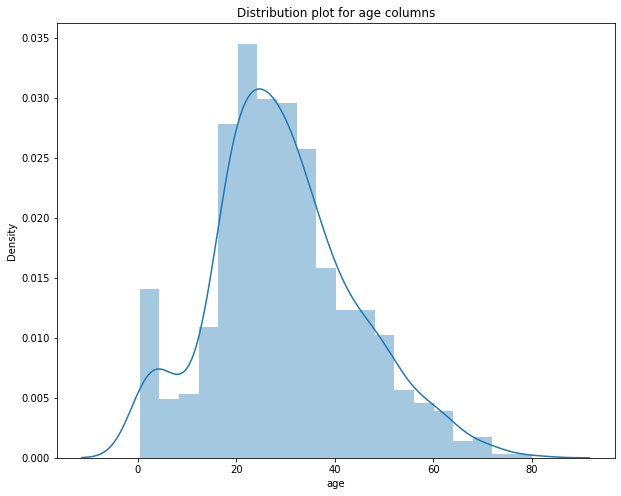

In [364]:
# construct a distribution plot to check it's data distribution
plt.figure(figsize=(10,8))
sns.distplot(df['age'])
plt.title("Distribution plot for age columns")
plt.show()

https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/sk1.png

From the above we can see that the distribution is symmetrical in shape so we can either fill the nan values with mean or median. Here i am filling it with median. Let's calculate the median:

In [365]:
median_value = df['age'].median()
median_value

28.0

fill the missing value with this median

In [366]:
df['age'] = df['age'].fillna(df['age'].median)

In [367]:
# Rechecking the missing value
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

Even now there are few columns with missing values and are very less so we can drop those directly.

In [368]:
df.dropna(inplace=True)

Text(0.5, 1.0, 'Heatmap for checking the null values ')

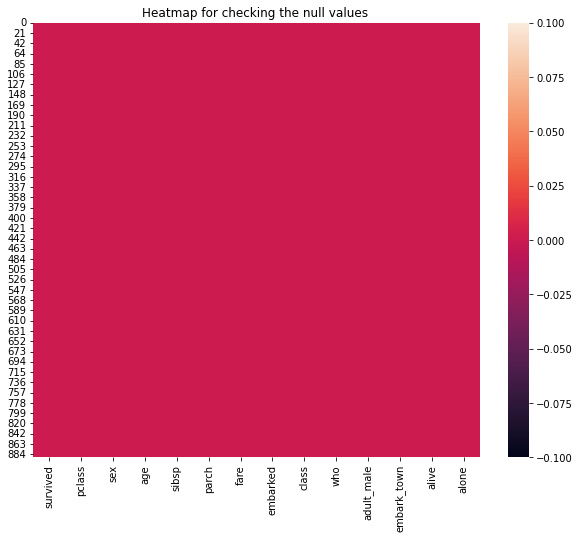

In [369]:
# Let's create a heat map to check the missing values 
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.title('Heatmap for checking the null values ')

The above heatmap looks neat and clean so there are no missing values.
Now let's move on to dtype handling.

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    object 
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        889 non-null    object 
 13  alone        889 non-null    bool   
dtypes: bool(2), float64(1), int64(4), object(7)
memory usage: 92.0+ KB


sex can't be an object as it is a category

age can't be an object it should be a int

In [371]:
df['sex'] = df['sex'].astype('category')

In [372]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,<bound method NDFrame._add_numeric_operations....,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [373]:
df.drop(888, inplace=True)

In [374]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.000,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,Queenstown,no,True


In [375]:
# There is an infinite value in age column so i need to drop it 
df.drop(columns=['age'], inplace=True)

In [376]:
df.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [377]:
df['pclass'].value_counts()

3    490
1    214
2    184
Name: pclass, dtype: int64

In [378]:
df['pclass'] = df['pclass'].map({3:'Third',1:'First',2:'Second'})

In [379]:
df.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,Third,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,First,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,Third,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,First,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,Third,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [380]:
df['class'].value_counts()

Third     490
First     214
Second    184
Name: class, dtype: int64

From the above we can see that the column class and pclass represent the same information so we can drop that column 
directly

In [381]:
df.drop(columns=['pclass'],inplace=True)

In [382]:
df.head()

,survived,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


## Start visualization 

In [383]:
# Let's see the count of people survived the crash or not 
count_survived = df['survived'].value_counts()
count_survived.iplot(kind='bar',title='count of survived')

From the above we can see that the count of people who have died and survived
* die == 546
* survived == 340

In [427]:
df.head()

,survived,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [429]:
#Pie chart to know the percentage of female and male
fig = px.pie(df, values='fare',names='sex')
fig.show()

In [389]:
# Let's us construct a pie chart to know the percentage of people survived based on gender.
fig = px.bar(df, y='survived',x='sex', title='count of survived based on gender')
fig.show()

From the above we can see that count of female survived is the most as compare to count of male. 

In [388]:
fig = px.scatter_3d(df, x='survived', y='sibsp', z='parch', color='sex', title='Survived based on there family members')
fig.show()

From the above also we can see that female survived the most with respect to there family members.

In [391]:
# What is the count of people travelling based on different classes
fig = px.pie(df,values='fare',names='class',title='different categories of fare to board the ship')
fig.show()

From the above we can see that most of the people travelled in first class as compare to others.

In [402]:
who_travelled = df['who'].value_counts()
who_travelled.iplot(kind='bar')

We can see that men travelled most as compare to others.

In [403]:
# Based on fare what is the count of people survived 
fig = px.scatter(df,x='survived', y='fare',color='who',size='parch', title='Survived based on fare')
fig.show()

Based on fare also female survived the most.

In [412]:
# Which category people board most at which port.
fig = px.bar(df, x='embark_town', y='fare', title='People board the ship most')
fig.show()

Most of the people board the ship mostly from southampton

In [415]:
# count of people travelling along
df['alone'].value_counts().iplot(kind='bar')

From the above we can see that most of the people where travelling alone as compared to others.

In [414]:
# who was alive based on fare class
fig = px.bar(df, x='alive',y='fare', color='sex')
fig.show()

From the above we can see that female survived most as compare to male.

In [424]:
df[['embark_town','class','survived']].value_counts().iplot(kind='bar')

we can see that the people those who are boarding from southampton are survived the most.

Summary:

From all the above observation we can say the following:

1. Female survived the most.
2. passenger those who board the ship at southampton survived the most.
3. Most of the people travell in first class.
4. Male travelled the most as compare to female.

# Thank you !